## Import Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Uplod File

In [ ]:
from google.colab import files
files.upload()

### Unzip File

In [3]:
!unzip travel_insurance.zip

Archive:  travel_insurance.zip
   creating: travel_insurance/
  inflating: travel_insurance/test.csv  
  inflating: travel_insurance/train.csv  


## Read Train Data and Display First 10 Rows

In [4]:
df = pd.read_csv('travel_insurance/train.csv')
df.head(10)

,Customer Id,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,3JUN0VW6F043,34,Private Sector/Self Employed,Yes,1300000,6,0,Yes,No,No
1,VLHY2ABIR4QL,28,Private Sector/Self Employed,Yes,750000,7,0,Yes,No,No
2,6E3F7UNXYNFF,28,Private Sector/Self Employed,Yes,750000,6,0,Yes,No,No
3,JJ8R0ZRYWR31,32,Government Sector,Yes,800000,6,1,No,No,No
4,2WGFUEX6IEHM,34,Private Sector/Self Employed,Yes,700000,4,1,No,No,No
5,V4GZ5HKMGHZ1,28,Government Sector,Yes,300000,6,1,No,No,No
6,VZRMW8H4O2AX,29,Private Sector/Self Employed,Yes,1100000,4,0,No,No,No
7,WBJUKIWUMMIU,28,Private Sector/Self Employed,Yes,500000,5,0,No,No,No
8,W4H1AN0T8WRJ,26,Private Sector/Self Employed,Yes,1500000,5,0,Yes,Yes,Yes
9,NMDQXNZ6ZP3Y,31,Government Sector,No,400000,3,0,No,No,No


In [5]:
df.shape

(1590, 10)

In [6]:
df = df.dropna()
df.shape

(1590, 10)

### Mean of 'AnnualIncome' Column

In [ ]:
AnnualIncome = df.loc[:,'AnnualIncome'].values
mu_AnnualIncome = np.mean(AnnualIncome)
print(int(mu_AnnualIncome))

928553


### Number of People who Ever Travelled Abroad

#### First Way

In [7]:
print(df['EverTravelledAbroad'].value_counts()['Yes'])

302


#### Second Way

In [8]:
print(df.loc[df['EverTravelledAbroad'] == 'Yes'].shape[0])

302


### Percentage of Employment Type

In [9]:
g = df['Employment Type'].value_counts()['Government Sector']
p = df['Employment Type'].value_counts()['Private Sector/Self Employed']
if g > p:
  print("Government Sector %.2f" % ((g/df.shape[0]) * 100))
else:
  print("Private Sector/Self Employed %.2f" % ((p/df.shape[0]) * 100))

Private Sector/Self Employed 72.64


### What percentage of people that have Chronic Diseases, have Travel Insurance?

In [10]:
ChronicDiseases = df.loc[df['ChronicDiseases'] == 1]
ChronicDiseases_and_TravelInsurance = ChronicDiseases['TravelInsurance'].value_counts()['Yes']
print("%.2f" % ((ChronicDiseases_and_TravelInsurance/ChronicDiseases.shape[0]) * 100))

37.53


## Label Encoding

In [11]:
from sklearn.preprocessing import  LabelEncoder
le = LabelEncoder()
df['Employment Type'] = le.fit_transform(df['Employment Type'])
df['GraduateOrNot'] = le.fit_transform(df['GraduateOrNot'])
df['FrequentFlyer'] = le.fit_transform(df['FrequentFlyer'])
df['EverTravelledAbroad'] = le.fit_transform(df['EverTravelledAbroad'])
df['TravelInsurance'] = le.fit_transform(df['TravelInsurance'])
df.head(10)

,Customer Id,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,3JUN0VW6F043,34,1,1,1300000,6,0,1,0,0
1,VLHY2ABIR4QL,28,1,1,750000,7,0,1,0,0
2,6E3F7UNXYNFF,28,1,1,750000,6,0,1,0,0
3,JJ8R0ZRYWR31,32,0,1,800000,6,1,0,0,0
4,2WGFUEX6IEHM,34,1,1,700000,4,1,0,0,0
5,V4GZ5HKMGHZ1,28,0,1,300000,6,1,0,0,0
6,VZRMW8H4O2AX,29,1,1,1100000,4,0,0,0,0
7,WBJUKIWUMMIU,28,1,1,500000,5,0,0,0,0
8,W4H1AN0T8WRJ,26,1,1,1500000,5,0,1,1,1
9,NMDQXNZ6ZP3Y,31,0,0,400000,3,0,0,0,0


## Separation X and Y

In [12]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values
print(x.shape)
print(y.shape)

(1590, 8)
(1590,)


## Standardize Train Data

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x)
X_train

array([[ 1.49582054,  0.61369649,  0.41123916, ..., -0.62341502,
         1.96529522, -0.48422314],
       [-0.56365817,  0.61369649,  0.41123916, ..., -0.62341502,
         1.96529522, -0.48422314],
       [-0.56365817,  0.61369649,  0.41123916, ..., -0.62341502,
         1.96529522, -0.48422314],
       ...,
       [ 1.49582054,  0.61369649, -2.43167504, ..., -0.62341502,
        -0.50882941, -0.48422314],
       [ 1.15257409, -1.62946998,  0.41123916, ..., -0.62341502,
        -0.50882941, -0.48422314],
       [-0.56365817,  0.61369649,  0.41123916, ...,  1.60406786,
         1.96529522, -0.48422314]])

## Read Test Data

In [14]:
test = pd.read_csv('travel_insurance/test.csv')
test.head(10)

,Customer Id,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,Q5OK4L2Q5XNH,34,Government Sector,Yes,1300000,7,0,No,No
1,CBHVMVE7TRP5,28,Private Sector/Self Employed,Yes,1450000,4,0,Yes,Yes
2,9UGHQ91U4F0M,28,Private Sector/Self Employed,Yes,900000,9,1,No,Yes
3,3UWXWMZK4ZGL,33,Private Sector/Self Employed,Yes,1500000,5,0,Yes,Yes
4,5CGEMLMBOPES,26,Government Sector,Yes,500000,5,0,No,No
5,SPJ0K6KGDGN7,27,Government Sector,Yes,1050000,5,0,Yes,No
6,9EFRT3UC3PDN,27,Government Sector,Yes,1050000,4,0,No,No
7,7BH09UOH5SVF,31,Government Sector,Yes,1300000,4,1,No,No
8,VYY6N0NLM8UE,31,Government Sector,Yes,1300000,4,0,No,No
9,NVER903056B7,33,Government Sector,Yes,700000,3,0,No,No


### Also We should Encode our Test data

In [15]:
test['Employment Type'] = le.fit_transform(test['Employment Type'])
test['GraduateOrNot'] = le.fit_transform(test['GraduateOrNot'])
test['FrequentFlyer'] = le.fit_transform(test['FrequentFlyer'])
test['EverTravelledAbroad'] = le.fit_transform(test['EverTravelledAbroad'])
test.head(10)

,Customer Id,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,Q5OK4L2Q5XNH,34,0,1,1300000,7,0,0,0
1,CBHVMVE7TRP5,28,1,1,1450000,4,0,1,1
2,9UGHQ91U4F0M,28,1,1,900000,9,1,0,1
3,3UWXWMZK4ZGL,33,1,1,1500000,5,0,1,1
4,5CGEMLMBOPES,26,0,1,500000,5,0,0,0
5,SPJ0K6KGDGN7,27,0,1,1050000,5,0,1,0
6,9EFRT3UC3PDN,27,0,1,1050000,4,0,0,0
7,7BH09UOH5SVF,31,0,1,1300000,4,1,0,0
8,VYY6N0NLM8UE,31,0,1,1300000,4,0,0,0
9,NVER903056B7,33,0,1,700000,3,0,0,0


### X Test Separation

In [16]:
X_test = test.iloc[:,1:].values
print(X_test.shape)

(397, 8)


### We should Standardize our Test data too

In [17]:
X_test = sc.transform(X_test)
X_test

array([[ 1.49582054, -1.62946998,  0.41123916, ..., -0.62341502,
        -0.50882941, -0.48422314],
       [-0.56365817,  0.61369649,  0.41123916, ..., -0.62341502,
         1.96529522,  2.06516359],
       [-0.56365817,  0.61369649,  0.41123916, ...,  1.60406786,
        -0.50882941,  2.06516359],
       ...,
       [-0.56365817,  0.61369649,  0.41123916, ...,  1.60406786,
        -0.50882941, -0.48422314],
       [-0.56365817,  0.61369649,  0.41123916, ..., -0.62341502,
        -0.50882941, -0.48422314],
       [-0.56365817, -1.62946998,  0.41123916, ..., -0.62341502,
        -0.50882941, -0.48422314]])

In [18]:
print(X_train.shape)
print(y.shape)
print(X_test.shape)

(1590, 8)
(1590,)
(397, 8)


### Predict with Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
classifier_LR = LogisticRegression(random_state = 42)
classifier_LR.fit(X_train, y)

LogisticRegression(random_state=42)

In [20]:
y_pred_lr = classifier_LR.predict(X_test)
dframe = pd.DataFrame({'Customer Id': test['Customer Id'], 'prediction': y_pred_lr})
dframe.head(10)

,Customer Id,prediction
0,Q5OK4L2Q5XNH,0
1,CBHVMVE7TRP5,1
2,9UGHQ91U4F0M,1
3,3UWXWMZK4ZGL,1
4,5CGEMLMBOPES,0
5,SPJ0K6KGDGN7,0
6,9EFRT3UC3PDN,0
7,7BH09UOH5SVF,0
8,VYY6N0NLM8UE,0
9,NVER903056B7,0


#### Logistic Regression Train Accuracy

In [26]:
y_pred_lr = classifier_LR.predict(X_train)
print(accuracy_score(y, y_pred_lr))

0.7761006289308177


#### Save output of Logistic Regression

In [ ]:
dframe.to_csv('output_lr.csv')

### Predict with SVM

In [21]:
from sklearn.svm import SVC
classifier_SVM = SVC(kernel = 'linear', random_state = 42)
classifier_SVM.fit(X_train, y)

SVC(kernel='linear', random_state=42)

In [22]:
y_pred_svm = classifier_SVM.predict(X_test)
dframe = pd.DataFrame({'Customer Id': test['Customer Id'], 'prediction': y_pred_svm})
dframe.head(10)

,Customer Id,prediction
0,Q5OK4L2Q5XNH,0
1,CBHVMVE7TRP5,1
2,9UGHQ91U4F0M,1
3,3UWXWMZK4ZGL,1
4,5CGEMLMBOPES,0
5,SPJ0K6KGDGN7,0
6,9EFRT3UC3PDN,0
7,7BH09UOH5SVF,0
8,VYY6N0NLM8UE,0
9,NVER903056B7,0


#### SVM Train Accuracy

In [27]:
y_pred_svm = classifier_SVM.predict(X_train)
print(accuracy_score(y, y_pred_svm))

0.7603773584905661


#### Save output of SVM

In [ ]:
dframe.to_csv('output_svm.csv')

### Create our ANN

In [23]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential(
    [
        Dense(8, input_dim=x.shape[-1], activation="relu", name="input"),
        Dense(64, activation="relu", name="layer1"),
        Dense(256, activation="relu", name="layer2"),
        Dense(256, activation="relu", name="layer3"),
        Dense(64, activation="relu", name="layer4"),
        Dense(1, activation="sigmoid", name="output")
    ],
    name="sequential_model"
)
model.summary()

Model: "sequential_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 8)                 72        
                                                                 
 layer1 (Dense)              (None, 64)                576       
                                                                 
 layer2 (Dense)              (None, 256)               16640     
                                                                 
 layer3 (Dense)              (None, 256)               65792     
                                                                 
 layer4 (Dense)              (None, 64)                16448     
                                                                 
 output (Dense)              (None, 1)                 65        
                                                                 
Total params: 99,593
Trainable params: 99,593
Non-

#### Plot ANN Model

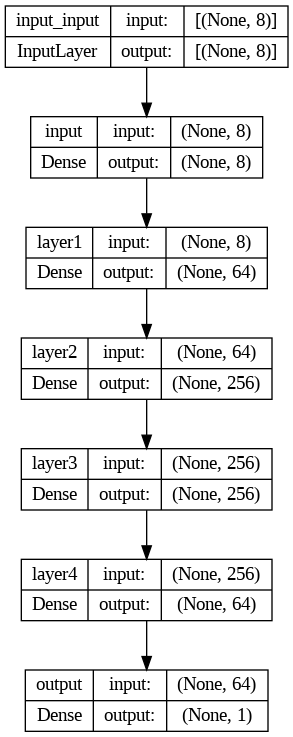

In [24]:
from keras import utils
utils.plot_model(model, show_shapes=True, show_layer_names=True)

#### Compile Model

In [25]:
model.compile(
        loss="binary_crossentropy", 
        optimizer="adam",
        metrics=["accuracy"]
    )
history = model.fit(X_train, y, batch_size=32, epochs=100)

Epoch 1/100
50/50 [==============================] - 2s 5ms/step - loss: 0.5697 - accuracy: 0.7258
Epoch 2/100
50/50 [==============================] - 0s 4ms/step - loss: 0.5149 - accuracy: 0.7660
Epoch 3/100
50/50 [==============================] - 0s 4ms/step - loss: 0.4948 - accuracy: 0.7849
Epoch 4/100
50/50 [==============================] - 0s 5ms/step - loss: 0.4762 - accuracy: 0.7956
Epoch 5/100
50/50 [==============================] - 0s 5ms/step - loss: 0.4819 - accuracy: 0.7874
Epoch 6/100
50/50 [==============================] - 0s 5ms/step - loss: 0.4687 - accuracy: 0.7962
Epoch 7/100
50/50 [==============================] - 0s 5ms/step - loss: 0.4653 - accuracy: 0.8000
Epoch 8/100
50/50 [==============================] - 0s 5ms/step - loss: 0.4547 - accuracy: 0.8038
Epoch 9/100
50/50 [==============================] - 0s 5ms/step - loss: 0.4520 - accuracy: 0.8088
Epoch 10/100
50/50 [==============================] - 0s 5ms/step - loss: 0.4454 - accuracy: 0.8107
Epoch 11/

#### Predict with ANN

In [28]:
y_pred_nn = model.predict(X_test)
y_pred_nn.shape

13/13 [==============================] - 1s 6ms/step


(397, 1)

In [29]:
dframe = pd.DataFrame({'Customer Id': test['Customer Id'], 'prediction': y_pred_nn.reshape(-1)})
dframe.head(10)

,Customer Id,prediction
0,Q5OK4L2Q5XNH,0.765095
1,CBHVMVE7TRP5,0.964101
2,9UGHQ91U4F0M,0.942746
3,3UWXWMZK4ZGL,0.999007
4,5CGEMLMBOPES,0.219180
5,SPJ0K6KGDGN7,0.002611
6,9EFRT3UC3PDN,0.952860
7,7BH09UOH5SVF,0.694925
8,VYY6N0NLM8UE,0.000052
9,NVER903056B7,0.000966


#### Save output of ANN

In [ ]:
dframe.to_csv('output_nn.csv')